In [1]:
import numpy as np
import os

# hack to import camvid_data_manager and the rest of the files like segnet_model, etc.
import sys
sys.path.append('../')

import kaggle_data_manager as kdm
import segnet_model
import kaggle_data_generator as kdg
import utils

#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

%matplotlib inline

## 1. Build the model, print summary and save the model.

print("Current working directory is ", os.getcwd())

segnet_instance = segnet_model.SegnetModel("../image_segmentation.ini")
model = segnet_instance.load_model()
if (model == None):
    print("Failed to find saved model data. Building model for training.")
    model = segnet_instance.build("optimizers.Adam()", loss_type = segnet_model.LossType.CROSS_ENTROPY_DICE_LOSS)

print("\n*** Model summary is as below\n")
print(model.summary())

print("\nSaving model")
segnet_instance.save()


Using TensorFlow backend.


Current working directory is  d:\illinois\deeplearning\deep_learning_project\src

Opened model file  carvana/car_image_segmentation_nn.json

Loading weights from file  carvana/cnn_image_segmentation_nn.h5

*** Model summary is as below

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 64) 256         conv2d_1[0][0]                   
______________________________________________________________________

Config values read from ini file are
Data path is ../../data. Image Width 512, Image Height 512
Done printing config values
../../data/train_masks.csv
train_masks_df.shape (5088, 2)
Image ids length  5088
Image path is ../../data/train 
total images are 5088 
Returning training images
Total training images is 5088
Image path is ../../data/train_masks 
total images are 5088 
Returning training images
Total training images in list is 5088
Here in plot_image()
00087a6bd4dc_01


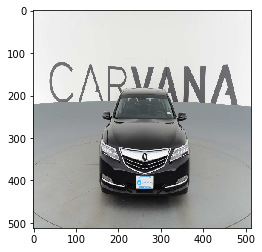

Here in plot_image_helper()


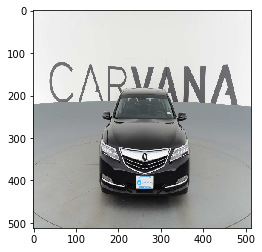

Here in plot_image()
00087a6bd4dc_01


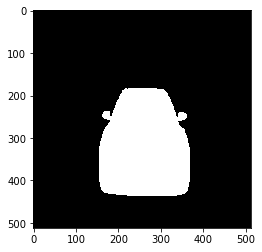

In [2]:
## 2. Instantiate the data manager
data_manager = kdm.KaggleDataManager("../image_segmentation.ini")


Resized
Here in plot_image_helper()


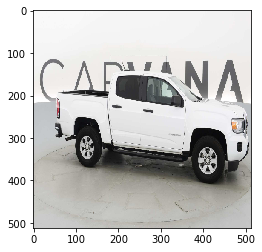

Done loading mask
(1280, 1918)
Mask shape is  (512, 512)
Mask shape after reshape is  (512, 512, 1)
Here in plot_image_helper()


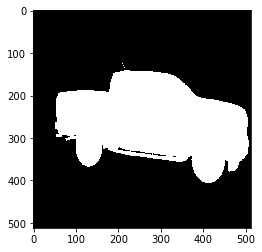

Masked image is
Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


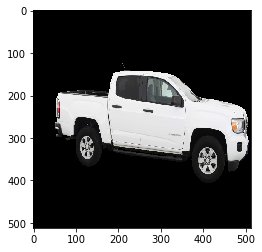

In [5]:
## Image plotting tests.
from skimage import io
import cv2
import utils
import matplotlib.pyplot as plt
from scipy import misc

%matplotlib inline

image_path = "../../data/train/2c57132da7a0_14.jpg"
image = misc.imread(image_path)
image = cv2.resize(image, (512, 512))
print("Resized")
utils.plot_image_helper(image)

mask_path = "../../data/train_masks/2c57132da7a0_14_mask.gif"
mask = io.imread(mask_path)
print("Done loading mask")
print(mask.shape)
mask[mask > 128] = 1
mask = cv2.resize(mask, (512, 512))
print("Mask shape is ", mask.shape)
# Add a color channel to the image.
mask = mask.reshape(mask.shape[0], mask.shape[1], 1)

print("Mask shape after reshape is ", mask.shape)
utils.plot_image_helper(mask, 'gray')

print("Masked image is")
utils.plot_image_with_mask(image, mask)



*** Testing data manager for batch type  BatchType.TRAIN_DATA
['28109f18d9d4_08' '9ab2a45de8c7_13' 'ce74dfdf123b_04' '5df60cf7cab2_07']
['28109f18d9d4_08' '9ab2a45de8c7_13' 'ce74dfdf123b_04' '5df60cf7cab2_07']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


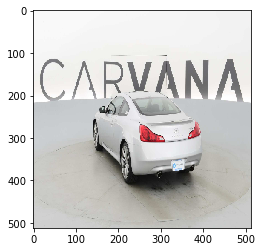

Here in plot_image_helper()


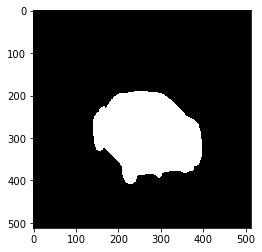

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


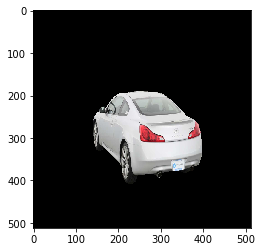

Here in plot_image_helper()


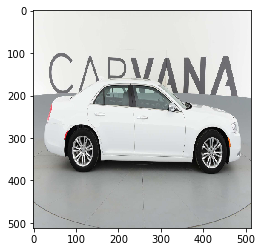

Here in plot_image_helper()


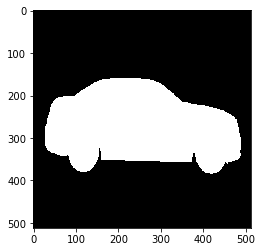

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


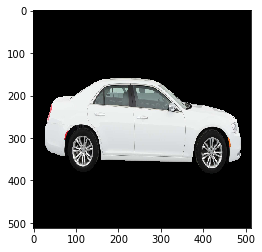

Here in plot_image_helper()


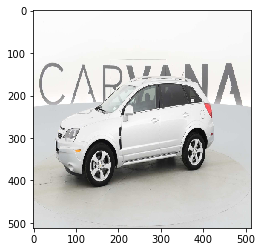

Here in plot_image_helper()


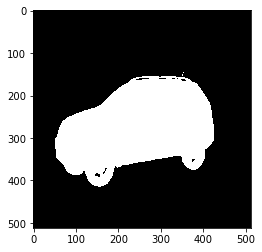

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


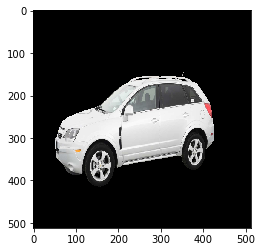

Here in plot_image_helper()


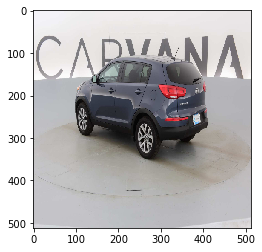

Here in plot_image_helper()


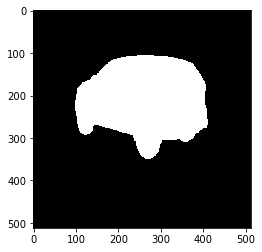

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


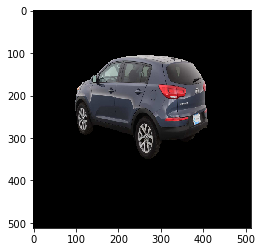

Total is  4
['768f299c36e1_13' '3627b6f4c16d_12' 'd46244bc42ed_01' '33a310ea7462_08']
['768f299c36e1_13' '3627b6f4c16d_12' 'd46244bc42ed_01' '33a310ea7462_08']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


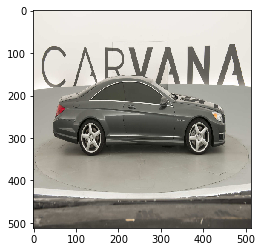

Here in plot_image_helper()


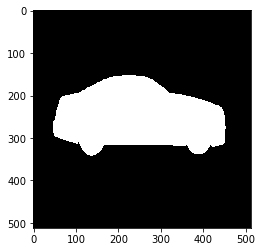

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


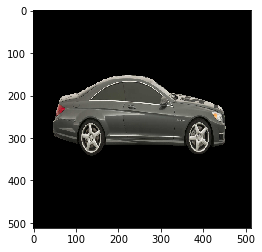

Here in plot_image_helper()


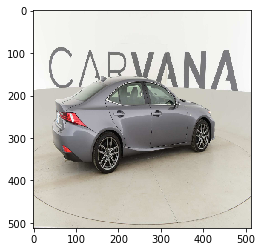

Here in plot_image_helper()


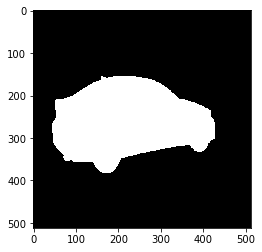

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


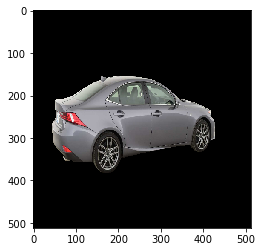

Here in plot_image_helper()


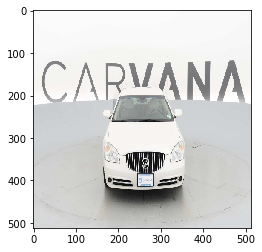

Here in plot_image_helper()


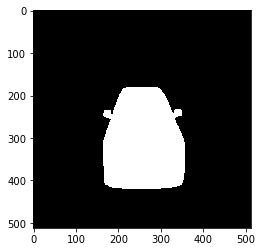

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


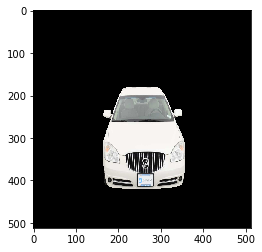

Here in plot_image_helper()


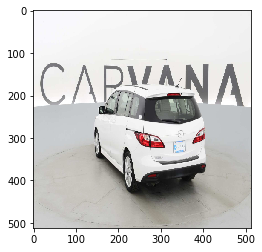

Here in plot_image_helper()


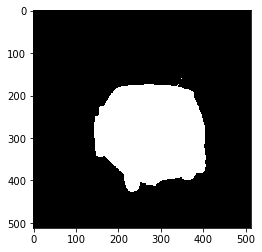

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


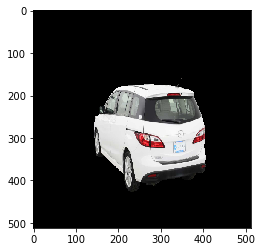

Total is  8
['c2fd64144e97_06' 'bec93f7ddb19_14' '154ee2b6d27a_10' '169f5f6d8c9d_07']
['c2fd64144e97_06' 'bec93f7ddb19_14' '154ee2b6d27a_10' '169f5f6d8c9d_07']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


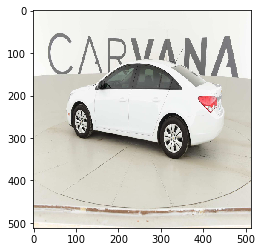

Here in plot_image_helper()


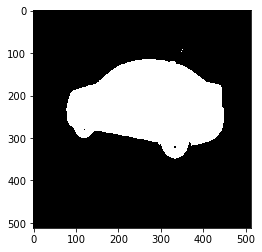

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


Here in plot_image_helper()


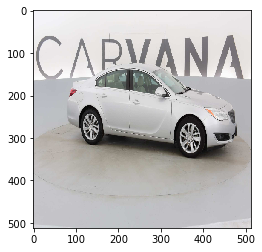

Here in plot_image_helper()


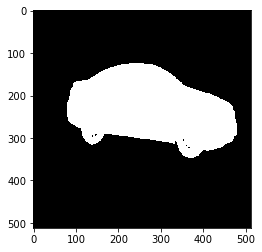

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


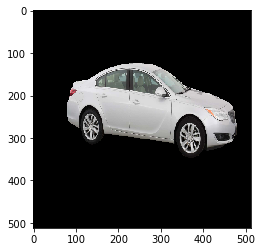

Here in plot_image_helper()


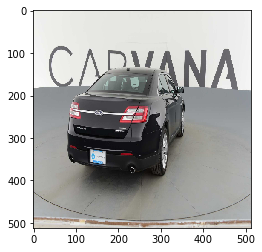

Here in plot_image_helper()


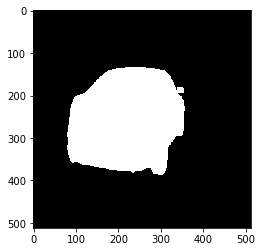

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


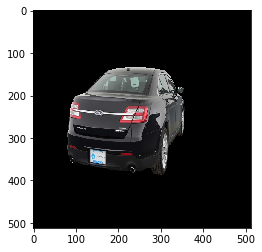

Here in plot_image_helper()


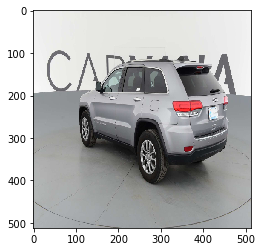

Here in plot_image_helper()


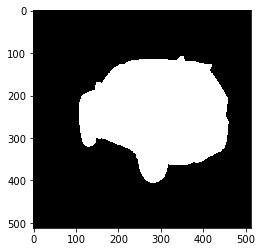

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


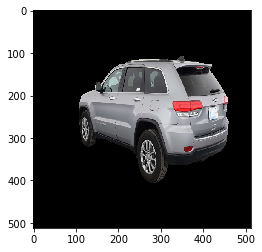

Total is  12

*** Done testing data manager for batch type  BatchType.TRAIN_DATA

*** Testing data manager for batch type  BatchType.VALIDATION_DATA
['880ab8468df2_07' '9c2e82c23803_09' '32ff007d9505_02' '3bca821c8c41_02']
['880ab8468df2_07' '9c2e82c23803_09' '32ff007d9505_02' '3bca821c8c41_02']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_helper()


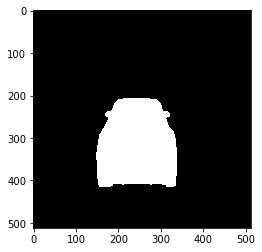

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


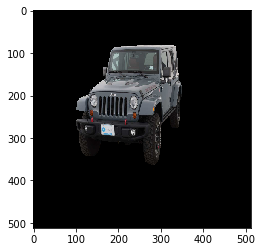

Here in plot_image_helper()


Here in plot_image_helper()


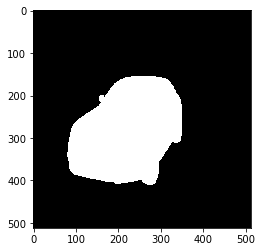

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


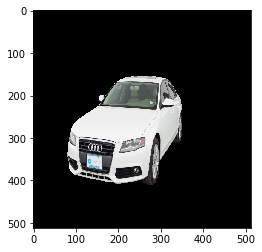

Total is  4
['02159e548029_06' '6bfd601be25e_01' '4e7bc95552ed_09' '33a310ea7462_15']
['02159e548029_06' '6bfd601be25e_01' '4e7bc95552ed_09' '33a310ea7462_15']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


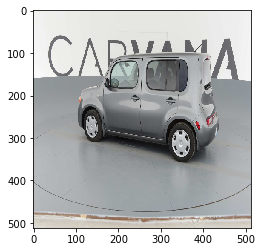

Here in plot_image_helper()


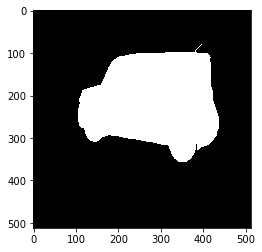

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


Here in plot_image_helper()


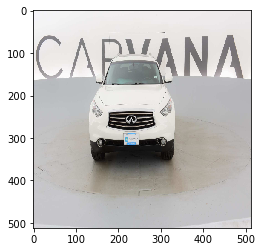

Here in plot_image_helper()


Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_helper()


Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


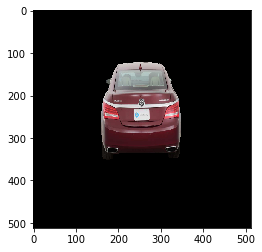

Here in plot_image_helper()


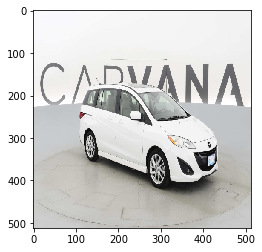

Here in plot_image_helper()


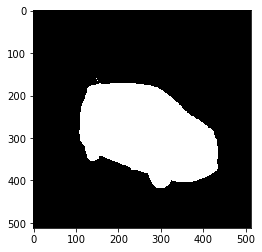

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


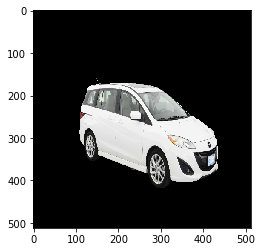

Total is  8
['ed13cbcdd5d8_05' '1e6f48393e17_01' 'd8216041ffa9_04' '6343156803f9_10']
['ed13cbcdd5d8_05' '1e6f48393e17_01' 'd8216041ffa9_04' '6343156803f9_10']
(4, 512, 512, 3) (4, 512, 512, 1)
Here in plot_image_helper()


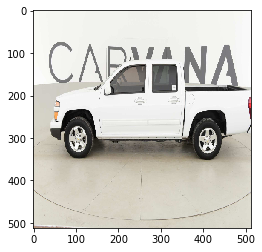

Here in plot_image_helper()


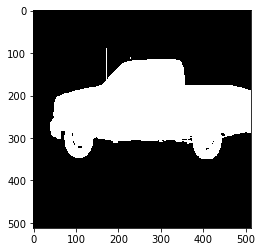

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


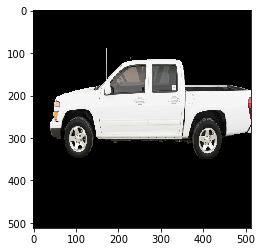

Here in plot_image_helper()


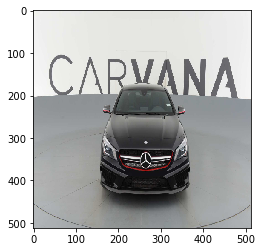

Here in plot_image_helper()


Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


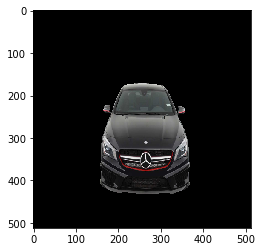

Here in plot_image_helper()


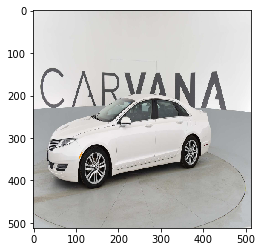

Here in plot_image_helper()


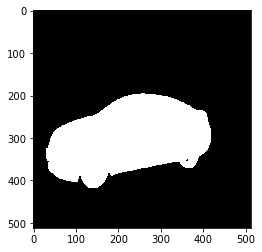

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


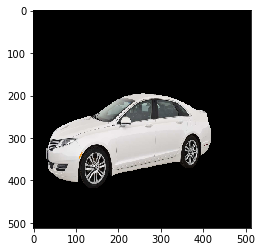

Here in plot_image_helper()


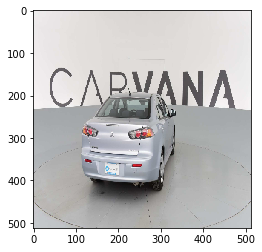

Here in plot_image_helper()


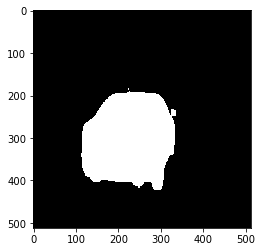

Here in plot_image_with_mask()
Mask shape is  (512, 512, 3)
Here in plot_image_helper()


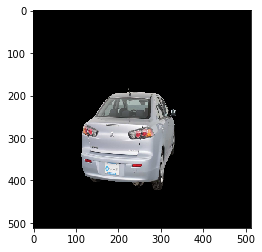

Total is  12

*** Done testing data manager for batch type  BatchType.VALIDATION_DATA


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Request training and validation images using the image generators and plot them.
def test_data_manager(data_manager, batch_type):
    print("\n*** Testing data manager for batch type ", batch_type)

    data_manager.init_generator(batch_type)
    total = 0
    while (total <= 10):
        iterator = None
        if (batch_type == kdg.BatchType.TRAIN_DATA):
            iterator = data_manager.get_next_batch_train(4)
        else:
            iterator = data_manager.get_next_batch_validate(4)
            
        for images, masks in iterator:
            count = 0
            for count in range(0, images.shape[0]):
                utils.plot_image_helper(images[count])
                utils.plot_image_helper(masks[count], 'gray')
                utils.plot_image_with_mask(images[count], masks[count])
            total = total + images.shape[0]
            print("Total is ", total)
            if (total >= 10):
                break
    print("\n*** Done testing data manager for batch type ", batch_type)
    
test_data_manager(data_manager, kdg.BatchType.TRAIN_DATA)
test_data_manager(data_manager, kdg.BatchType.VALIDATION_DATA)
